In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# a, b in [0, 1]

def and_gate(vals):
    product = 1
    for value in vals:
        product *= value
    return product

def or_gate(vals):
    return 1 - nor(vals)

def nand(vals):
    return 1 - and_gate(vals)

def nor(vals):
    product = 1
    for value in vals:
        product *= (1-value)
    return product
    
gates = [and_gate, or_gate, nand, nor]

In [3]:
class Node:
    def __init__(self, index=None):
        self.index = index
        self.state = np.random.random()
        self.gate = np.random.choice(gates)
        self.ingoing_indices = []
        self.outgoing_indices = []
        
        
class Network:
    def __init__(self, size, num_inputs=2):
        self.size = size
        self.nodes = np.array([Node(index=i) for i in range(size)])
        self.state_history = [self.yield_states()]
        self.time = 0
        
        self.randomly_connect_nodes(num_inputs=num_inputs)
        
    def randomly_connect_nodes(self, num_inputs=2):
        for node in self.nodes:
            node.ingoing_indices = [np.random.randint(0, self.size) for _ in range(num_inputs)]
            for index in node.ingoing_indices:
                self.nodes[index].outgoing_indices.append(node.index)
                
    def timestep(self):
        updated_states = []
        for i in range(self.size):
            node = self.nodes[i]
            inputs = [self.nodes[node.ingoing_indices[i]].state for i in range(len(node.ingoing_indices))]
            updated_states.append(node.gate(inputs))
            
        self.state_history.append(updated_states)
        self.time += 1
            
        for i in range(self.size):
            self.nodes[i].state = updated_states[i]
            
    def show_connections(self):
        for node in self.nodes:
            print(node.ingoing_indices, node.outgoing_indices)
    
    def show_states(self):
        for node in self.nodes:
            print(node.state)
            
    def yield_states(self):
        states = []
        for node in self.nodes:
            states.append(node.state)
        return states

In [6]:
a = Network(25, num_inputs=2)
for _ in range(40):
    a.timestep()

Text(0.5, 0, 'Time')

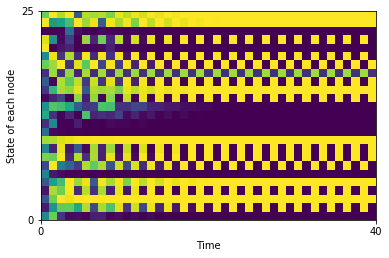

In [7]:
history_map = np.asarray(a.state_history).transpose()
history_map = np.flip(history_map, 0)
plt.imshow(history_map, extent=[0, a.time, 0, a.size])

plt.yticks([0, a.size])
plt.ylabel("State of each node")

plt.xticks([0, a.time])
plt.xlabel("Time")

In [8]:
a.show_connections()

[1, 15] [21]
[13, 14] [0, 10]
[5, 8] [9]
[7, 10] [6, 19, 20, 21]
[8, 15] [13, 23]
[13, 9] [2, 9]
[15, 3] [8]
[16, 18] [3, 14, 24]
[19, 6] [2, 4, 14, 18]
[2, 5] [5, 15]
[1, 10] [3, 10, 12, 23]
[19, 20] []
[10, 24] []
[23, 4] [1, 5]
[7, 8] [1, 16]
[24, 9] [0, 4, 6]
[20, 14] [7, 18]
[17, 22] [17]
[16, 8] [7]
[19, 3] [8, 11, 19, 22]
[23, 3] [11, 16]
[3, 0] [24]
[23, 19] [17]
[4, 10] [13, 20, 22]
[21, 7] [12, 15]
